In [1]:
import numpy as np
import pandas as pd
import os 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, VotingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Data Dictionary (Car Price) – key fields used:
- price (target): Selling price (USD)
- brand: Extracted from CarName (manufacturer)
- fueltype, aspiration, carbody, drivewheel, enginelocation, enginetype, fuelsystem (categorical)
- doornumber, cylindernumber (converted from words to numbers)
- Engine/performance numerics like wheelbase, carlength, carwidth, curbweight, enginesize, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg

In [3]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [4]:
print(df.shape)
df.isnull().sum()

(205, 26)


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
df.drop('car_ID', axis=1, inplace=True)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df['brand'] = df['CarName'].apply(lambda x: x.split()[0].lower())
df.drop('CarName', axis=1, inplace=True)
df["brand"].value_counts()

brand
toyota         31
nissan         18
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
jaguar          3
chevrolet       3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
mercury         1
porcshce        1
Name: count, dtype: int64

In [7]:
# Clean up misspellings
df["brand"] = df["brand"].replace({
    "vokswagen": "volkswagen",
    "vw": "volkswagen",
    "toyouta": "toyota",
    "maxda": "mazda",
    "porcshce": "porsche"
})
print(df["brand"].value_counts())
df.head()

brand
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: count, dtype: int64


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


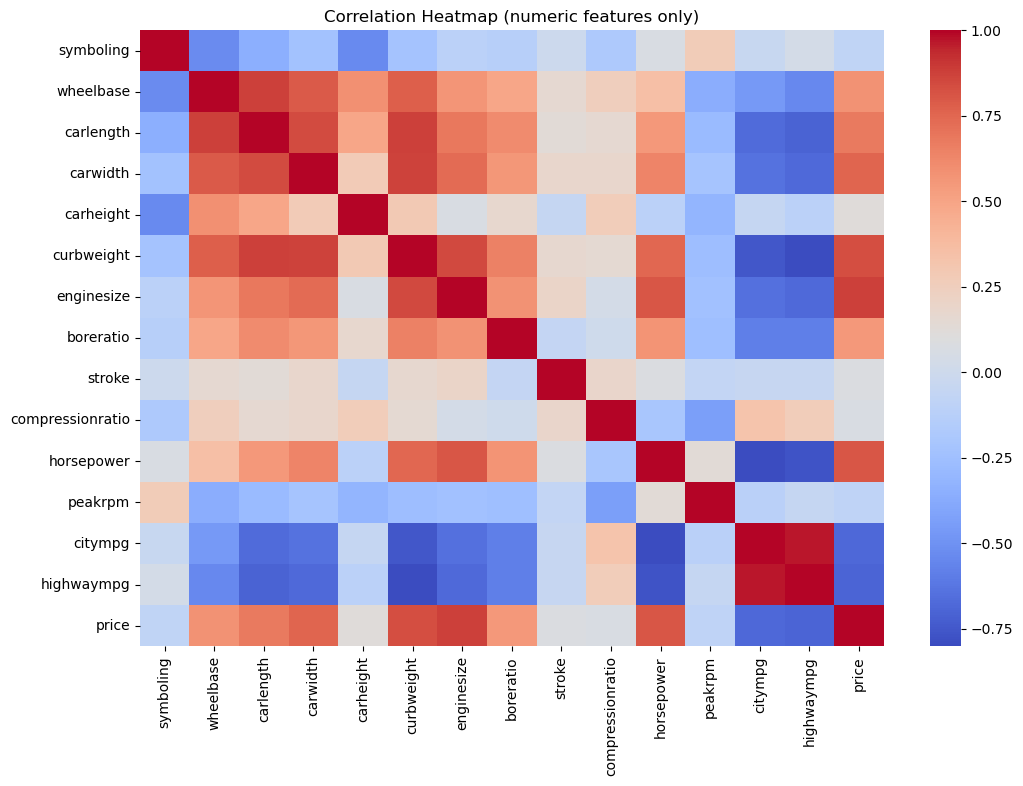

In [8]:
num_df = df.select_dtypes(include=[np.number])  # only numeric columns

plt.figure(figsize=(12,8))
sns.heatmap(num_df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap (numeric features only)")
plt.show()

#### Graph Interpretations:
The raw-feature correlation heatmap shows strong positive relationships between price and engine-related attributes such as enginesize, horsepower, curbweight, carwidth, and carlength. These features increase with vehicle performance and size, which aligns with real-world pricing.

On the negative side, citympg and highwaympg are inversely correlated with price, meaning more fuel-efficient cars generally cost less.
Overall, this heatmap highlights the primary drivers of price before any encoding or modeling.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [10]:
df['fueltype'].value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

In [11]:
df['aspiration'].value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

In [12]:
df['doornumber'].value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

In [13]:
def number_(x):
    return x.map({'two': 2, 'four': 4})
    
df['doornumber'] = df[['doornumber']].apply(number_)

In [14]:
def convert_number(x):
    return x.map({'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12})

df['cylindernumber'] = df[['cylindernumber']].apply(convert_number)

In [15]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
cat_cols = X_train.select_dtypes(include="object").columns

for col in cat_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    
pd.concat([X_train, y_train], axis=1).info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 66 to 102
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         164 non-null    int64  
 1   fueltype          164 non-null    int64  
 2   aspiration        164 non-null    int64  
 3   doornumber        164 non-null    int64  
 4   carbody           164 non-null    int64  
 5   drivewheel        164 non-null    int64  
 6   enginelocation    164 non-null    int64  
 7   wheelbase         164 non-null    float64
 8   carlength         164 non-null    float64
 9   carwidth          164 non-null    float64
 10  carheight         164 non-null    float64
 11  curbweight        164 non-null    int64  
 12  enginetype        164 non-null    int64  
 13  cylindernumber    164 non-null    int64  
 14  enginesize        164 non-null    int64  
 15  fuelsystem        164 non-null    int64  
 16  boreratio         164 non-null    float64
 17  s

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,brand
66,0,0,0,4,3,2,0,104.9,175.0,66.1,...,134,3,3.43,3.64,22.0,72,4200,31,39,9
111,0,1,0,4,3,2,0,107.9,186.7,68.4,...,120,5,3.46,2.19,8.4,95,5000,19,24,13
153,0,1,0,4,4,1,0,95.7,169.7,63.6,...,92,1,3.05,3.03,9.0,62,4800,31,37,19
96,1,1,0,4,3,1,0,94.5,165.3,63.8,...,97,1,3.15,3.29,9.4,69,5200,31,37,12
38,0,1,0,2,2,1,0,96.5,167.5,65.2,...,110,0,3.15,3.58,9.0,86,5800,27,33,6


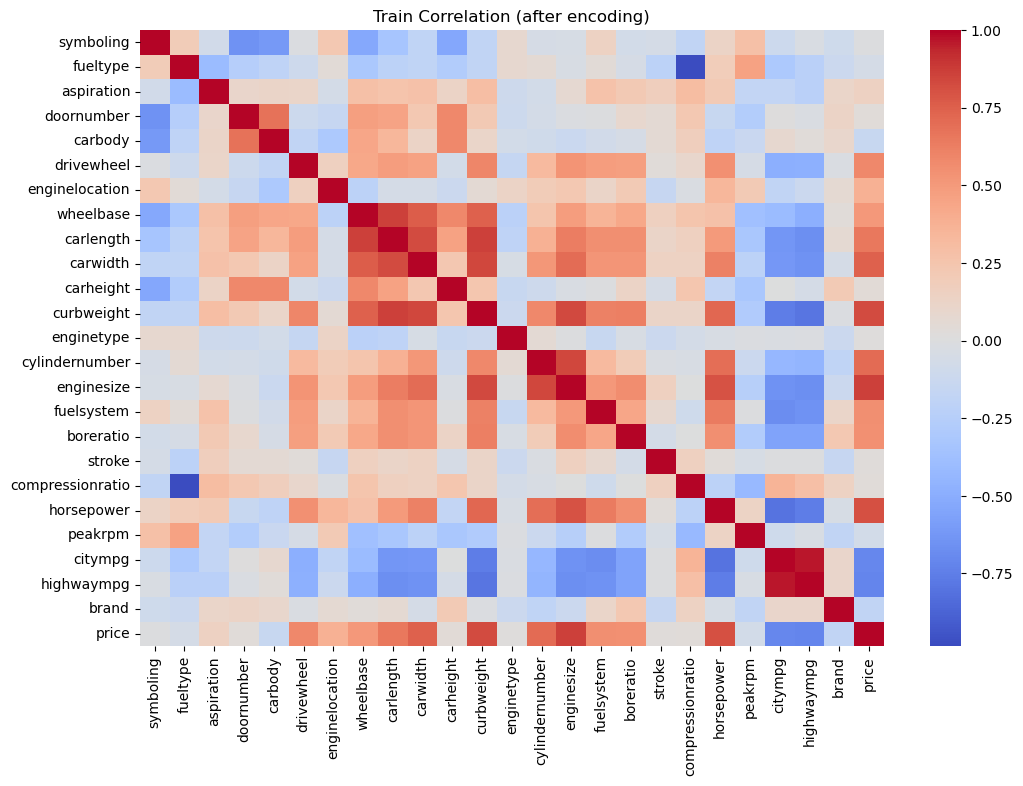

In [17]:
tmp = X_train.copy()
tmp['price'] = y_train.values
plt.figure(figsize=(12,8))
sns.heatmap(tmp.corr(), cmap='coolwarm', annot=False)
plt.title("Train Correlation (after encoding)")
plt.show()

#### Graph Interpretation: 
After encoding, all features become numeric, revealing a more complex correlation structure. Engine and dimension variables still show clear positive correlation with price, confirming the pattern seen in raw data.

Categorical variables (now integer-encoded) show weaker but still visible relationships to price, although these correlations should be interpreted cautiously because label encodings impose arbitrary numeric ordering.

This heatmap mainly reassures us that preprocessing preserved the important patterns and that engine-related features remain dominant predictors.

### Pre-processing Steps (Summary):
1. Loaded CSV from repository (no absolute paths)
2. Dropped car_ID; extracted brand from CarName; removed CarName
3. Converted text numerals: doornumber, cylindernumber
4. Train/test split (80/20) with random_state=42
5. Spleeing correction and label-encoded categorical features fit on train only and applied to test
6. Basic plots (correlation heatmaps)

In [18]:
results = {}
rmse = {}
train_r2 = {}

In [19]:
def eval(model, tag):
    y_pred = model.predict(X_test)
    results[tag] = r2_score(y_test, y_pred)
    rmse[tag] = np.sqrt(mean_squared_error(y_test, y_pred))
    train_r2[tag] = r2_score(y_train, model.predict(X_train))
    
    print(tag, "Test R^2 Score:", results[tag])
    print(tag, "Train R^2 Score", train_r2[tag])
    print(tag, "RMSE:", rmse[tag])

    return y_pred

In [20]:
#Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
eval(lr_model, "Linear Regression")

Linear Regression Test R^2 Score: 0.8527606284612413
Linear Regression Train R^2 Score 0.9106172228172564
Linear Regression RMSE: 3409.350087782632


array([26041.08290695, 17589.17807491,  9837.64817097, 13257.63842333,
       26560.45271217,  6192.31295347,  8157.57220189,  5773.99200048,
        9495.55295552,  6823.81092942, 13391.94435074,  5533.59269332,
       16502.41649224, 10512.98555664, 40059.15526385,  6202.91161312,
        1087.54506315, 14528.84168811,  9578.7300437 , 10211.14053017,
       11394.78242052, 20942.06630376,  7522.27102275,  4019.92999677,
        7585.8455909 , 25005.42281467, 13714.34232385, 15980.31101344,
        5255.14067186, 16367.6891892 , 26554.69786723,  6831.31101153,
        4615.65852194, 21870.24732653,  7990.11495982, 26668.94638877,
       10231.08869598, 10136.11934289,  7120.79495989, 14725.93428343,
        7459.71978031])

Random Forest Test R^2 Score: 0.955940661891242
Random Forest Train R^2 Score 0.9856989738450533
Random Forest RMSE: 1864.9990100806183


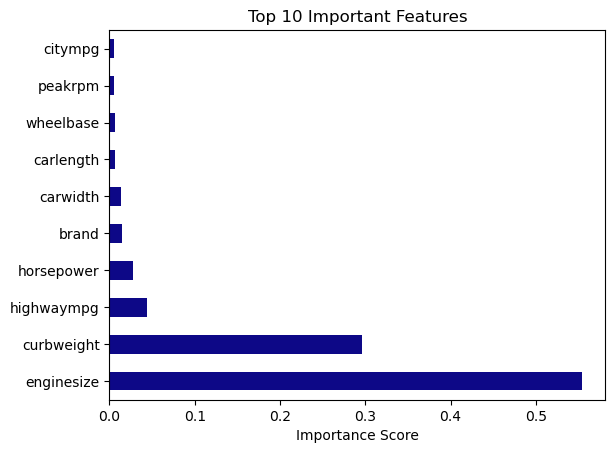

In [21]:
#Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
eval(rf_model, "Random Forest")

importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', colormap='plasma')
plt.title("Top 10 Important Features")
plt.xlabel("Importance Score")
plt.show()

#### Graph Interpretation
The Random Forest identifies engine size, weight, highway mpg, horsepower, and dimensions attributes as the most influential predictors of price. These make intuitive sense: larger, more powerful vehicles typically have higher manufacturing costs and market value.

Categorical features contribute less individually due to label encoding, but collectively still provide signal.
This chart gives a clear understanding of which features the model actually relies on to make predictions, reinforcing our earlier correlation findings.

In [22]:
#KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
eval(knn_model, "KNN")

KNN Test R^2 Score: 0.7716421435736786
KNN Train R^2 Score 0.8910591018063454
KNN RMSE: 4245.878870829147


array([19291.8, 20017. ,  8701.8, 12382. , 28423.8,  7129. ,  7964.8,
        7695.6,  9111. ,  7376.4, 17031.6,  7691. , 11851.8, 11408.2,
       35796.8,  6692.2,  6046.6, 14720. ,  8645. ,  8701.8,  9788.6,
       16107.4,  7129. ,  6106.4,  6677.6, 21025.4,  9878. , 18203. ,
        7129. , 17616. , 24967. ,  6677.6,  8305.2, 19756. ,  8412.2,
       24967. ,  9588.2, 14898. ,  6549.5, 14507.2,  8305.2])

In [23]:
#Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
eval(dt_model, "Decision Tree")

Decision Tree Test R^2 Score: 0.901544856258777
Decision Tree Train R^2 Score 0.9986537119069865
Decision Tree RMSE: 2787.910494118634


array([36880., 15998.,  8949., 12170., 33900.,  5118.,  7995.,  8358.,
        8921.,  7995., 12170.,  8058., 13645., 11248., 45400.,  6338.,
        5399., 12764.,  6989.,  8921., 10245., 13499.,  5118.,  5389.,
        7609., 36880.,  8449., 16515.,  7349., 15985., 33900.,  6189.,
        6989., 19045.,  7957., 35056., 11694., 11845.,  6575., 14869.,
        9233.])

In [24]:
#Bagging
bg_model = BaggingRegressor(estimator=dt_model, n_estimators=100, random_state=42, n_jobs=-1)
bg_model.fit(X_train, y_train)
bg_ypred = eval(bg_model, "Bagging")

Bagging Test R^2 Score: 0.9564364376867963
Bagging Train R^2 Score 0.9855253167320656
Bagging RMSE: 1854.4764147450953


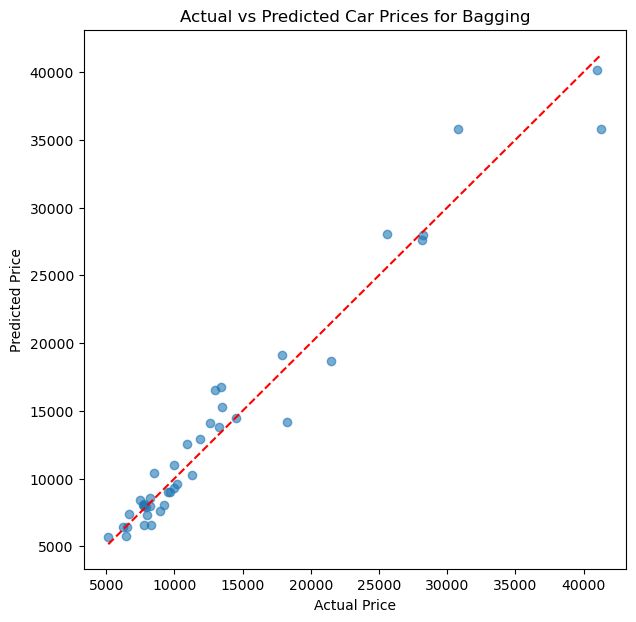

In [25]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, bg_ypred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices for Bagging")
plt.show()

#### Graph Interpretation:
This scatter plot for bagging model compares the model’s predicted prices with the actual selling prices. Most points lie close to the diagonal reference line, indicating that the model makes accurate predictions across a wide range of car prices. Slight spreading at higher price values suggests the model has a bit more difficulty predicting expensive cars, which is expected because there are fewer high-end vehicles in the dataset. Overall, the plot shows strong predictive alignment, confirming that the model captures the main pricing patterns well.

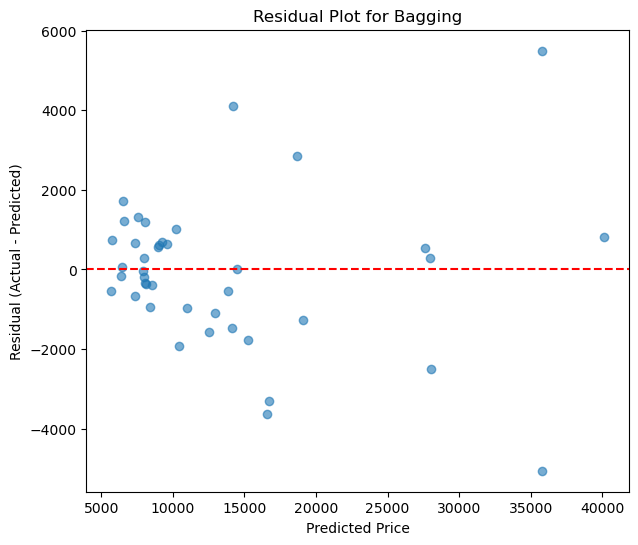

In [26]:
residuals = y_test - bg_ypred

plt.figure(figsize=(7,6))
plt.scatter(bg_ypred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot for Bagging")
plt.show()

#### Graph Interpretation: 
Residuals appear centered around zero with no clear upward or downward trend, suggesting that the bagging model does not systematically over- or under-predict across the price range. Some larger residuals appear at higher predicted values, reflecting greater variability in price among expensive cars. The mostly random scatter indicates the model is well-fit, with no obvious structure left unexplained.

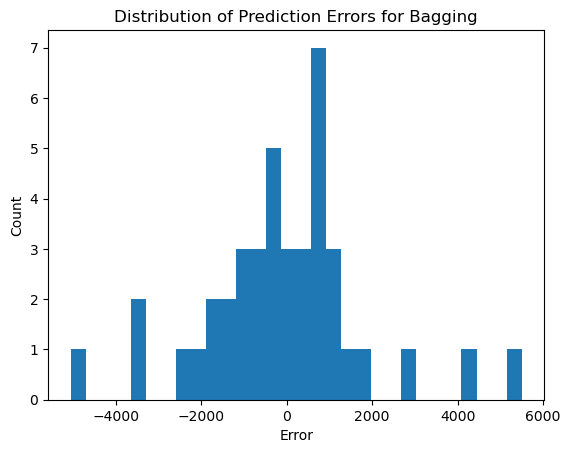

In [27]:
plt.hist(residuals, bins=30)
plt.title("Distribution of Prediction Errors for Bagging")
plt.xlabel("Error")
plt.ylabel("Count")
plt.show()

#### Graph Interpretation:
The distribution of residuals is roughly centered around zero, indicating that the bagging model’s errors are balanced. It does not consistently over-predict or under-predict. Most errors fall within a moderate range, with only a few larger deviations.

In [28]:
#Voting
vt_model = VotingRegressor([
    ("lin", lr_model),
    ("rf", rf_model),
    ("knn", knn_model),
])
vt_model.fit(X_train, y_train)
eval(vt_model, "Voting")

Voting Test R^2 Score: 0.9012383165314168
Voting Train R^2 Score 0.9572961638189945
Voting RMSE: 2792.2471956927398


array([27087.96430232, 18981.61269164,  9174.47939032, 12837.49114111,
       27596.44090406,  6615.32431782,  8026.20740063,  7179.19400016,
        9413.28876295,  7463.01864314, 14732.67033913,  7041.52756444,
       14104.84633075, 10945.01629666, 38613.93342128,  6457.22720437,
        4270.74502105, 14397.17945159,  8919.39001457,  9373.91851006,
       10524.90247351, 17423.64876792,  7042.92367425,  5269.63666559,
        7208.60686363, 27327.98593822, 10867.41077462, 16953.67033781,
        6569.32022395, 16847.84972973, 26508.31928908,  6625.92700384,
        6934.25284065, 20111.80244218,  8154.14998661, 26444.82546292,
        9971.98289866, 12524.78978096,  7063.00831996, 14577.67365003,
        8072.1882601 ])

In [29]:
#MLP
scaler_mlp = StandardScaler()
X_train_mlp = scaler_mlp.fit_transform(X_train)
X_test_mlp  = scaler_mlp.transform(X_test)

mlp = MLPRegressor(
    hidden_layer_sizes=(128, 64),
    activation="relu",
    solver="lbfgs",
    alpha=1e-2,
    max_iter=5000,
    random_state=42
)

mlp.fit(X_train_mlp, y_train)

y_pred_mlp_test  = mlp.predict(X_test_mlp)
y_pred_mlp_train = mlp.predict(X_train_mlp)

mlp_r2_test  = r2_score(y_test,  y_pred_mlp_test)
mlp_r2_train = r2_score(y_train, y_pred_mlp_train)
mlp_rmse     = mean_squared_error(y_test, y_pred_mlp_test) ** 0.5

mlp_gap = mlp_r2_train - mlp_r2_test
mlp_percent_gap = 100 * mlp_gap / abs(mlp_r2_train)

print(f"MLP Test R^2:  {mlp_r2_test:.6f}")
print(f"MLP Train R^2: {mlp_r2_train:.6f}")
print(f"MLP RMSE:      {mlp_rmse:.4f}")
print(f"MLP gap:       {mlp_percent_gap:.4f}%")

results["MLP"]  = mlp_r2_test
train_r2["MLP"] = mlp_r2_train
rmse["MLP"]     = mlp_rmse




MLP Test R^2:  0.683494
MLP Train R^2: 0.998506
MLP RMSE:      4998.6285
MLP gap:       31.5484%


#### Important Observations for MLP:
The MLP is definitely overfitting in our example, as the test R^2 is very high but the training R^2 is much lower. This is because MLP is designed for larger datasets with thousands of values; a data size of 205 is very small by comparison, meaning that without any regulation, it easily starts memorizing the data. 

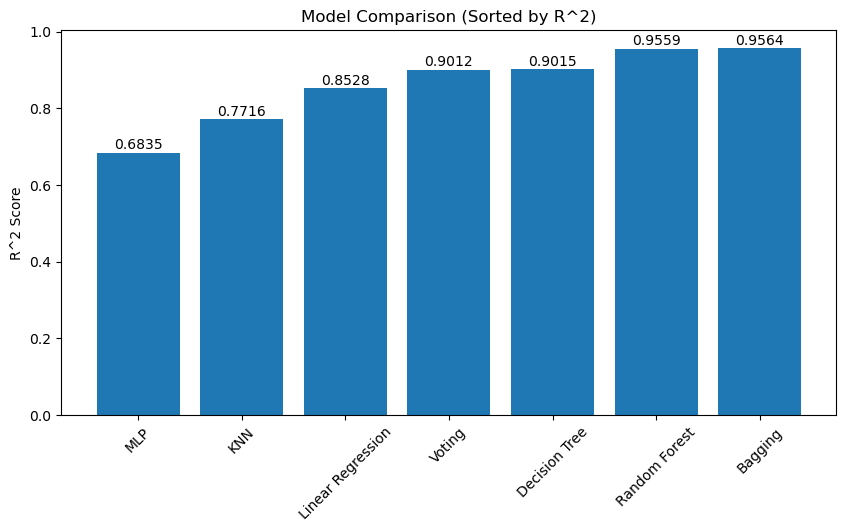

In [30]:
sorted_results = dict(sorted(results.items(), key=lambda x: x[1]))

plt.figure(figsize=(10,5))
plt.bar(sorted_results.keys(), sorted_results.values())
plt.ylabel("R^2 Score")
plt.title("Model Comparison (Sorted by R^2)")
plt.xticks(rotation=45)

for i, v in enumerate(sorted_results.values()):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')

plt.show()

#### Graph Interpretation:
As the graph shows, models such as Random Forest, Bagging, and Voting achieve the highest R^2 scores. It demonstrates that ensemble methods capture non-linear relationships better than individual models. Linear Regression forms a reasonable baseline but underfits compared to ensembles. Decision Tree and KNN score lower due to variance and sensitivity to scaling. This ranking highlights that ensemble models generalize best for this dataset. As mentioned above, MLP has a lower R^2 than the rest due to overfitting.

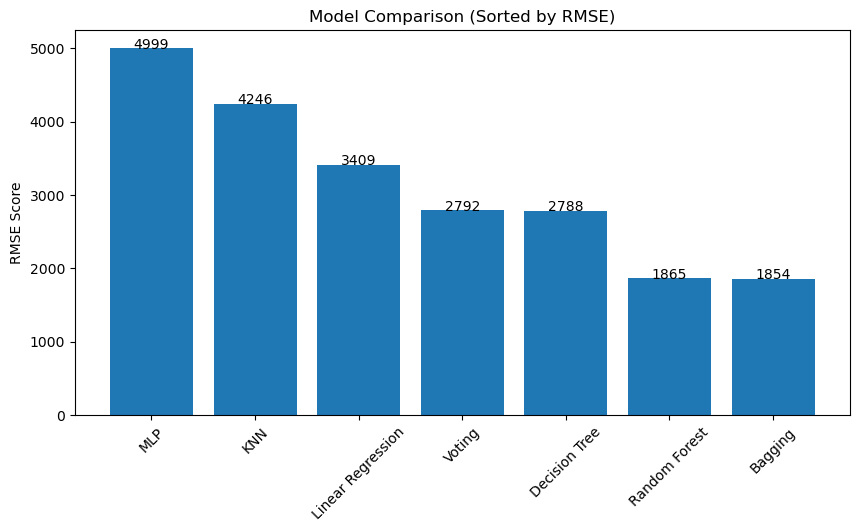

In [31]:
sorted_rmse = dict(sorted(rmse.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(10,5))
plt.bar(sorted_rmse.keys(), sorted_rmse.values())
plt.ylabel("RMSE Score")
plt.title("Model Comparison (Sorted by RMSE)")
plt.xticks(rotation=45)

for i, v in enumerate(sorted_rmse.values()):
    plt.text(i, v + 0.01, f"{v:.0f}", ha='center')

plt.show()

#### Graph Interpretation:
RMSE measures the average dollar error of predictions. Ensemble models again produce the lowest RMSE, meaning their price predictions are closer to actual values. Higher RMSE values for models like KNN and Decision Tree indicate inconsistent performance. This reinforces that ensemble models provide the most accurate and reliable predictions in practical terms. As mentioned above, MLP has a larger RMSE than the rest since it is inaccurate with new data due to overfitting. 

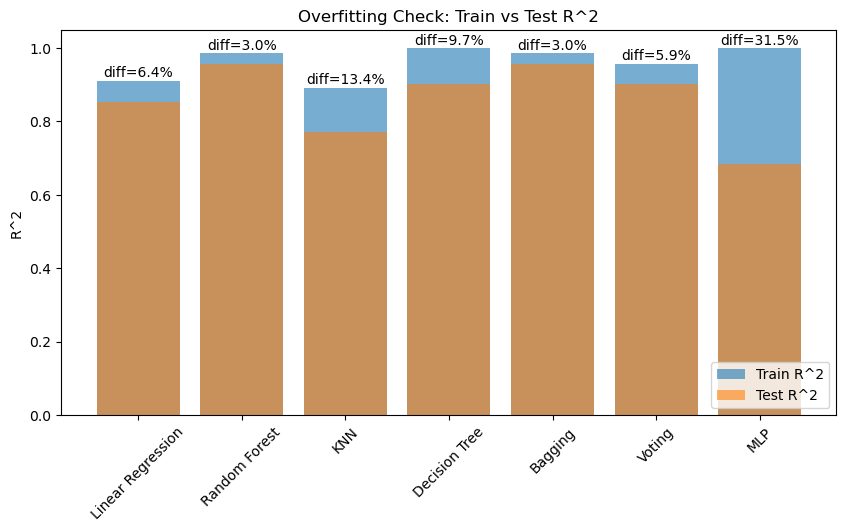

In [32]:
plt.figure(figsize=(10,5))
plt.bar(train_r2.keys(), train_r2.values(), alpha=0.6, label="Train R^2")
plt.bar(results.keys(), results.values(), alpha=0.6, label="Test R^2")
plt.xticks(rotation=45)
plt.ylabel("R^2")
plt.title("Overfitting Check: Train vs Test R^2")
plt.legend(loc="lower right")

for i, name in enumerate(train_r2.keys()):
    train_val = train_r2[name]
    test_val = results[name]
    gap = train_val - test_val
    percent_gap = 100 * gap / abs(train_val)

    y_pos = max(train_val, test_val) + 0.01
    plt.text(i, y_pos, f"diff={percent_gap:.1f}%", ha='center')

plt.show()

#### Graph Interpretation: 
As shown in the graph, the gap between training and testing R^2 reveals how much each model overfits. Decision Trees and Bagging show higher train R^2 compared to test R^2, reflecting their tendency to memorize training data.
This visualization demonstrates how ensemble methods have the best balance between fitting the data and avoiding overfitting. As mentioned above, the MLP has largest gap than the rest because it is not ideal for small datasets. 